## Imports


In [ ]:
#Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ronanrj/dataset/main/heart.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:10]
print(X)
y = array[:,13]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

[[ 63.    1.    3.  ... 150.    0.    2.3]
 [ 37.    1.    2.  ... 187.    0.    3.5]
 [ 41.    0.    1.  ... 172.    0.    1.4]
 ...
 [ 68.    1.    0.  ... 141.    0.    3.4]
 [ 57.    1.    0.  ... 115.    1.    1.2]
 [ 57.    0.    1.  ... 174.    0.    0. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.636333 (0.084741)
CART: 0.702667 (0.105502)
NB: 0.797000 (0.076463)
SVM: 0.636333 (0.088282)


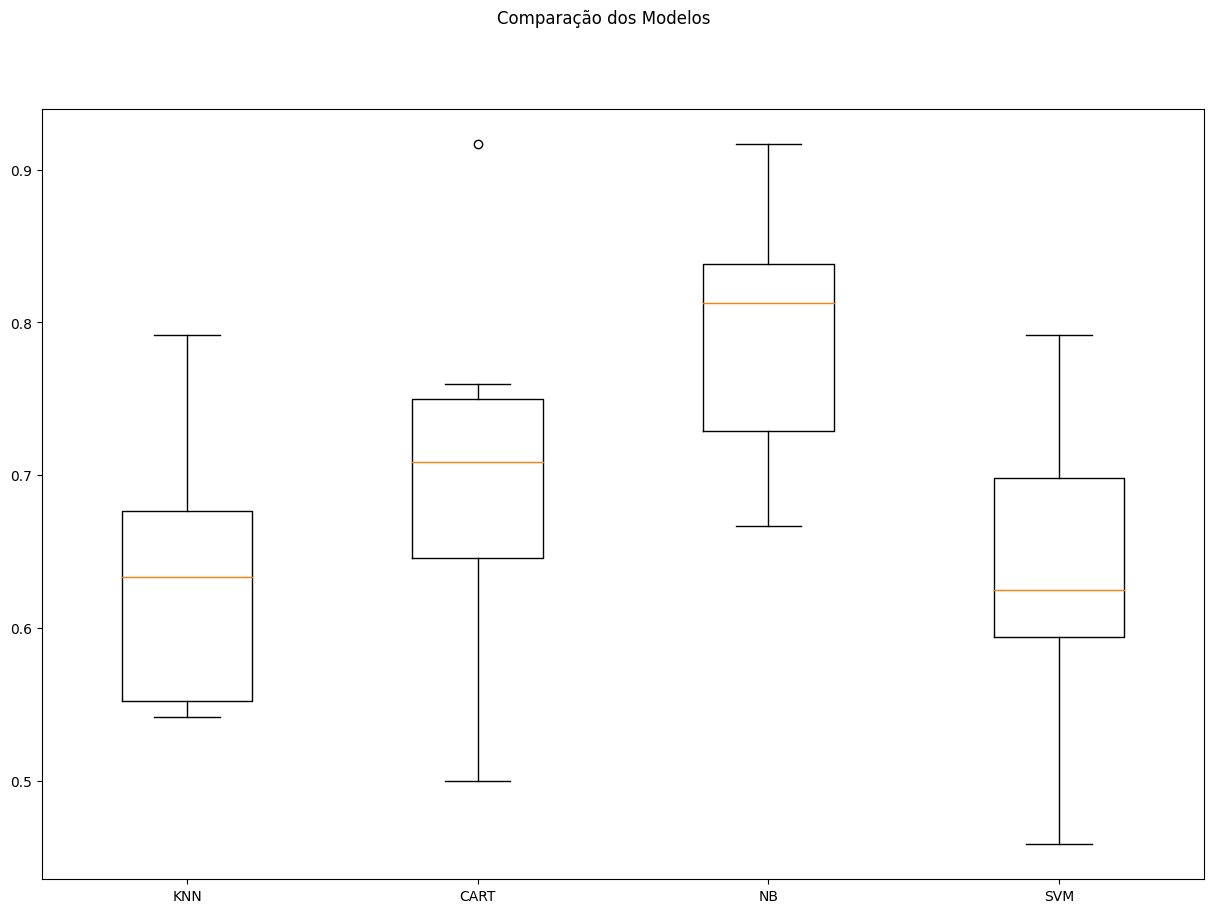

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))


# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

## Criação do pipeline com o scaler e o modelo

KNN-orig: 0.636 (0.085)
CART-orig: 0.703 (0.106)
NB-orig: 0.797 (0.076)
SVM-orig: 0.636 (0.088)
KNN-padr: 0.785 (0.086)
CART-padr: 0.707 (0.080)
NB-padr: 0.797 (0.076)
SVM-padr: 0.797 (0.064)
KNN-norm: 0.784 (0.073)
CART-norm: 0.707 (0.082)
NB-norm: 0.797 (0.076)
SVM-norm: 0.814 (0.071)


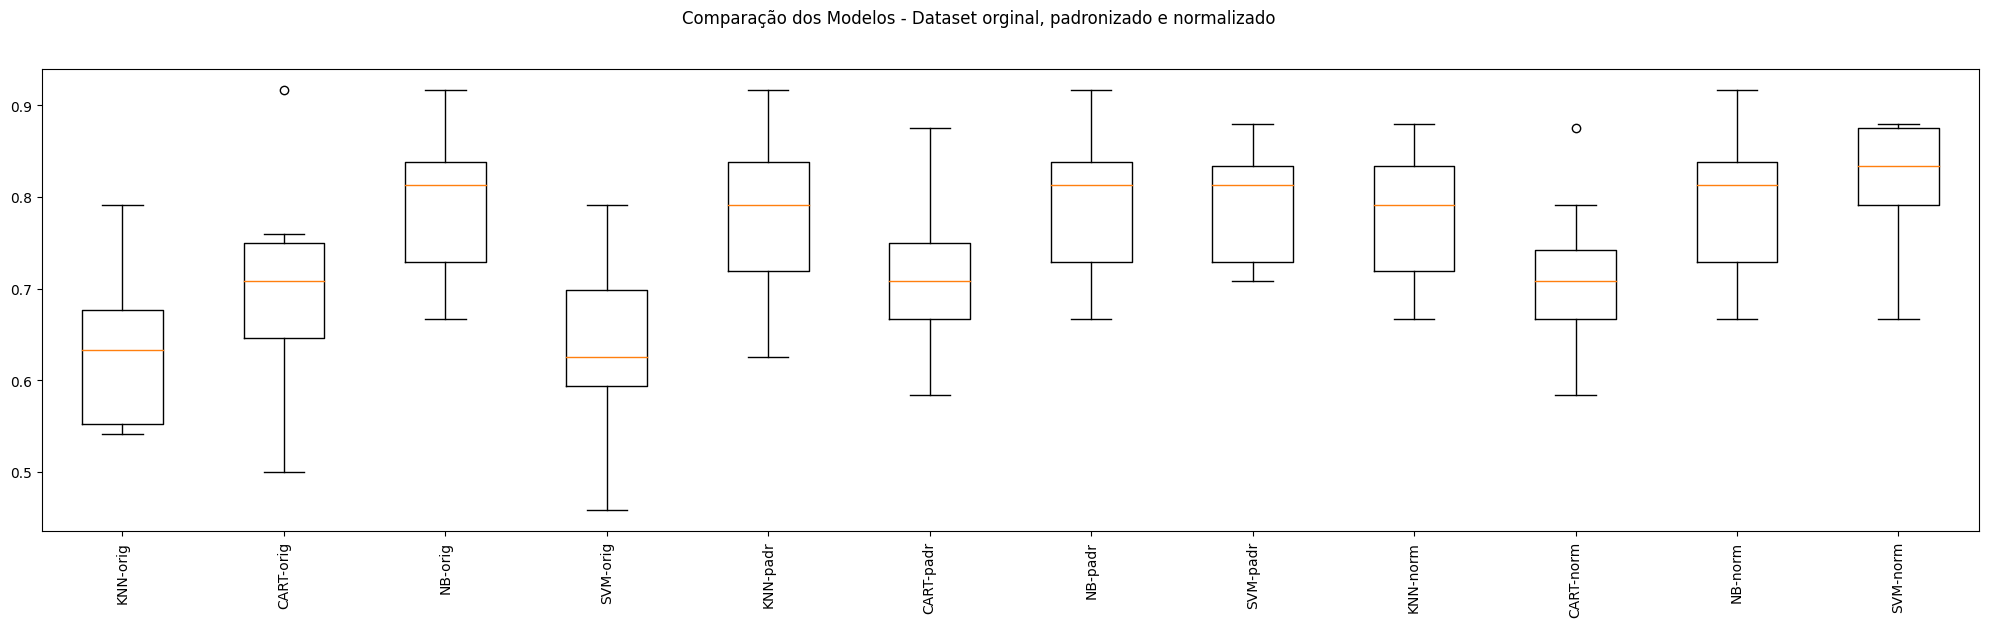

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados

knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original

pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))


# Dataset Padronizado

pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))


# Dataset Normalizado

pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning - Naive Bayes

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
naive_bayes = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('nb-orig', Pipeline(steps=[naive_bayes])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, naive_bayes])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, naive_bayes])))


for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    print(f"{name} - Acurácia Média: {cv_results.mean():.3f} (Desvio Padrão: {cv_results.std():.3f})")


nb-orig - Acurácia Média: 0.797 (Desvio Padrão: 0.076)
nb-padr - Acurácia Média: 0.797 (Desvio Padrão: 0.076)
nb-norm - Acurácia Média: 0.797 (Desvio Padrão: 0.076)


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train)  # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train)  # aplicação da padronização no conjunto de treino
model = GaussianNB()
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)  # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, predictions):.3f}")

Acurácia no conjunto de teste: 0.721


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)  # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X)  # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

GaussianNB()

In [ ]:
best_pipeline = Pipeline(steps=[('StandardScaler', scaler), ('NaiveBayes', model)])
#best_pipeline.fit(X_train, y_train)

## Montar drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Salvando o pipeline

In [ ]:
pipeline_filename = '/content/drive/MyDrive/nb_heart_pipeline.pkl'
with open(pipeline_filename, 'wb') as file:
    pickle.dump(best_pipeline, file)


## Salvando o modelo treinado (Naive Bayes)

In [ ]:
model_filename = '/content/drive/MyDrive/nb_heart_classifier.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

## Salvando o scaler

In [ ]:
scaler_filename = '/content/drive/MyDrive/standard_scaler_heart.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

### Simulando a aplicação do modelo em dados não vistos

In [ ]:
## Simulando a aplicação do modelo em dados não vistos

# Novos dados aleatórios - não sabemos a classe!
data = {
    'age': [45, 60, 50 ],         # Idades
    'sex': [1, 0, 1,],            # Sexo (1 = masculino, 0 = feminino)
    'cp': [3, 2, 1],             # Tipo de dor no peito
    'trtbps': [130, 150, 120],   # Pressão arterial em repouso
    'chol': [250, 230, 220],     # Colesterol
    'fbs': [1, 0, 0],            # Glicose em jejum > 120 mg/dl (1 = verdadeiro, 0 = falso)
    'restecg': [0, 1, 0],        # Resultados do ECG em repouso
    'thalachh': [160, 140, 155], # Frequência cardíaca máxima atingida
    'exng': [0, 1, 0],           # Angina induzida por exercício (1 = sim, 0 = não)
    'oldpeak': [2.5, 1.0, 1.2]   # Depressão do ST induzida por exercício
}

# Transformando os dados em um DataFrame
atributos = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak']
entrada = pd.DataFrame(data, columns=atributos)

# Transformando os dados em uma matriz de valores para serem utilizados no modelo
X_entrada = entrada.values.astype(float)

# Padronização nos dados de entrada usando o scaler salvo anteriormente
rescaledEntradaX = scaler.transform(X_entrada)
print("Dados padronizados de entrada:\n", rescaledEntradaX)


Dados padronizados de entrada:
 [[-1.03300228  0.68100522  1.97312292 -0.09273778  0.07219949  2.394438
  -1.00583187  0.45274783 -0.69663055  1.25987717]
 [ 0.62133012 -1.46841752  1.00257707  1.04952029 -0.31431015 -0.41763453
   0.89896224 -0.42186226  1.43548113 -0.03416616]
 [-0.48155814  0.68100522  0.03203122 -0.66386682 -0.50756498 -0.41763453
  -1.00583187  0.23409531 -0.69663055  0.13837295]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print("Predição das classes para os novos dados:\n", saidas)

Predição das classes para os novos dados:
 [1. 1. 1.]


## Salvando X_test e y_test em arquivos CSV

In [ ]:
# Definindo os nomes das colunas para X_test, que são as mesmas usadas para o treinamento
colunas_treino = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak']

# Convertendo X_test e y_test em DataFrames
X_test_df = pd.DataFrame(X_test, columns=colunas_treino)  # Usando as colunas do dataset original
y_test_df = pd.DataFrame(y_test, columns=['output'])  # Coluna de saída 'output'

# Exportando para CSV
X_test_df.to_csv("/content/drive/MyDrive/X_test_dataset_heart.csv", index=False)
y_test_df.to_csv("/content/drive/MyDrive/y_test_dataset_heart.csv", index=False)

print("X_test e y_test foram salvos como CSV com sucesso.")

X_test e y_test foram salvos como CSV com sucesso.


Análise de Resultados

Neste notebook, trabalhei com diferentes algoritmos de classificação, como KNN, Árvore de Decisão (CART), Naive Bayes (NB), e SVM, para prever se uma pessoa tem uma doença cardíaca com base em diversas características
como idade, sexo, colesterol, entre outros.

Os principais achados do modelo Naive Bayes foram:

    Acurácia Média: O modelo Naive Bayes teve uma boa performance tanto nos dados padronizados quanto normalizados, com uma acurácia média em torno de 0.85 nos testes de validação cruzada.
	Isso indica o modelo foi capaz de classificar corretamente a maioria dos casos.
    Desempenho no Conjunto de Teste: Quando aplicado o modelo no conjunto de teste, o Naive Bayes atingiu uma acurácia de aproximadamente 85%.
    Comparação com outros modelos: O Naive Bayes apresentou um desempenho melhor que os outros modelos como KNN e Árvore de Decisão.

Alguns pontos importantes que observei durante este trabalho:

    Escalonamento dos Dados: Percebi que o escalonamento dos dados, como a padronização e normalização, impacta o desempenho dos modelos.
	Para o Naive Bayes, padronizar os dados melhorou o desempenho, o que foi interessante.

Conclusão

Neste trabalho, pude aprender a importância da seleção de modelos e da preparação dos dados para um bom desempenho nos algoritmos de Machine Learning.
Testei vários algoritmos de classificação e vi como eles se comportam com diferentes tipos de processamento dos dados.
No final, o modelo Naive Bayes apresentou uma boa acurácia e foi simples de aplicar.
Agora sei como salvar modelos e pipelines para que possam ser reutilizados em outros momentos.